In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

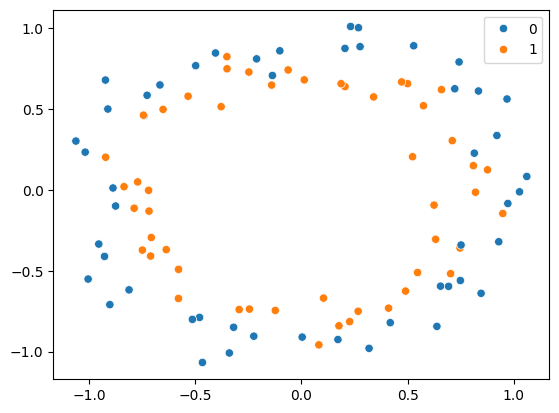

In [3]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [5]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

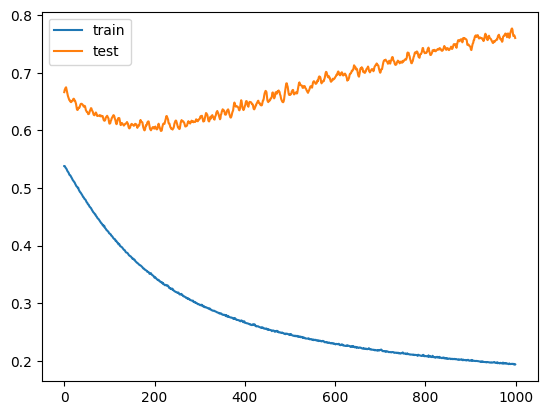

In [9]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 8s 860us/step


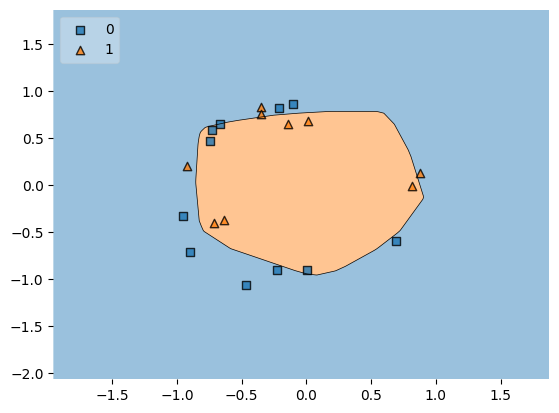

In [10]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [11]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, callbacks=callback)

Epoch 1/1000
3/3 [==============================] - 1s 66ms/step - loss: 0.6925 - accuracy: 0.5125 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 2/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6900 - accuracy: 0.5250 - val_loss: 0.6963 - val_accuracy: 0.4500
Epoch 3/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.6887 - accuracy: 0.5500 - val_loss: 0.6974 - val_accuracy: 0.3500
Epoch 4/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6877 - accuracy: 0.5250 - val_loss: 0.6986 - val_accuracy: 0.3500
Epoch 5/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6866 - accuracy: 0.5250 - val_loss: 0.6994 - val_accuracy: 0.3500
Epoch 6/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.6858 - accuracy: 0.5375 - val_loss: 0.7009 - val_accuracy: 0.3500
Epoch 7/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6848 - accuracy: 0.5250 - val_loss: 0.7017 - val_accuracy: 0.3500
Epoch 8/1000


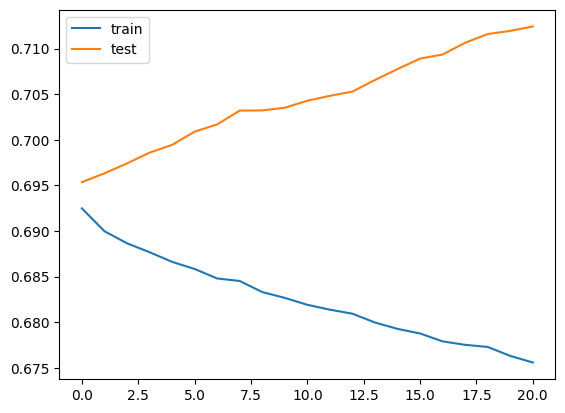

In [15]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 8s 797us/step


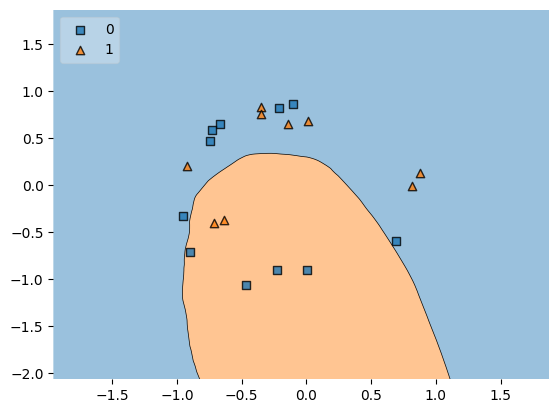

In [16]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()